Digite a quantidade de rodadas
1000


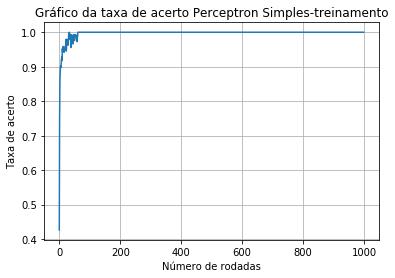

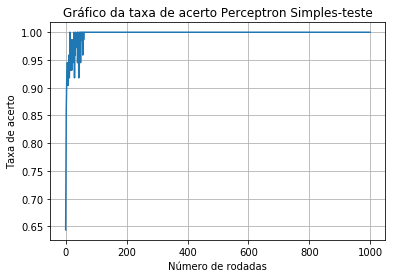

In [2]:
import pandas as pd;
import random;
import matplotlib.pyplot as plt;
%matplotlib inline
#abrindo arquivo com pandas
arq=pd.read_csv("dermatology.csv");
colunas=arq.columns[:34];
#Normalizando dados
for col in colunas:
    menor=arq[col].min();
    maior=arq[col].max();
    arq[col]=arq[col].apply(lambda x:(x-menor)/(maior-menor));



txApr=0.05;#taxa de aprendizado
arq.insert(loc=0,column="X0",value=-1);
#inserindo uma nova coluna que corresponde a entrada -1
TaxaAcerto=[];
TaxaAcertoTeste=[];
#criando uma lista para armazenar as taxas de acertos
Nrodadas=int(input("Digite a quantidade de rodadas\n"));#quantidade de rodadas

#classe para representar cada neurônio
class Neuronio():
    
    def __init__(self):
        #criando os pesos de cada neurônio
        #foi utilizado o random.random() para criar pesos iniciais de 0 a 1
        self.pesos=[random.random() for a in range(0,35)];


#criando os 6 neurônios
neuronios=[Neuronio() for a in range(0,6)];


#criando um dicionário para a representação das classes
#no qual a classe 1 seria o vetor ou lista [1 0 0 0 0 0]
#no qual a classe 2 seria o vetor ou lista [0 1 0 0 0 0]
#no qual a classe 3 seria o vetor ou lista [0 0 1 0 0 0]
#no qual a classe 4 seria o vetor ou lista [0 0 0 1 0 0]
#no qual a classe 5 seria o vetor ou lista [0 0 0 0 1 0]
#no qual a classe 6 seria o vetor ou lista [0 0 0 0 0 1]


classes={}


#criando o dicionario com as classes em forma de vetor
for a in range(0,6):
    classes[(a+1)]=[0]*6;#primeiro criando chave que vai de 1 a 6(numero da classe) ao mesmo tempo que cria uma lista com zeros
    classes[(a+1)][a]=1;#em seguida alterá-se o valor daquela lista pelo valor 1
    
    
#função para calcular o produto escalar
def ProdutoEscalar(vet1,vet2):
    soma=0;#soma, resultado do produto escalar
    
    for a in range(0,35):
        soma+=(vet1[a]*vet2[a]);#incrementando com a multiplicação das duas listas, ou dois vetores passados como parâmetro
    
    return soma;#retornando produto escalar
#print(neuronios[0].pesos);

#função de aprendizado. Gera os novos pesos para os neurônios
def GerarNovosPesos(pesos,entrada,taxa,erro):
    pesosnovos=[];#criando lista para armazenar os novos pesos
    #loop para criar os novos pesos
    for a in range(0,35):
        #pesos antigos + n*e*entrada
        #dessa forma ele calcula linha por linha cada novo peso
        pesosnovos.append(pesos[a]+(taxa*erro*entrada[a]));
    
    return pesosnovos;#retorna os novos pesos

#loop de treinamento
for cont in range(0,Nrodadas):
    dataset=(arq.sample(frac=1)).values;#datasetEmbaralhado
    treinamento=dataset[:293];#dividindo a amostra em 80% para treinamento
    teste=dataset[293:];#amostra para teste
    #contador de acertos
    ContAcerto=0;
    ContAcertoTeste=0;
   #etapa treinamento
    for trein in treinamento:
       
        numClas=trein[35];#guardando valor da classe dessa amostra de treinamento
        vetorDesejado=classes[numClas];#buscando no dicionário a representação desta classe em forma de vetor
        acerto=1;#variavel auxiliar para saber se acertou ou não(0 não haverá incremento, 1 haverá)
        #aqui foi decidido usar uma variavel auxiliar ao em vez de guardar tudo em um vetor ou lista para depois verificar
        # se houve acerto ou não
        #o motivo disso é que dessa forma é um pouco mais rápido
        
        #print("vetor desejado: %r\n"%(vetorDesejado));
        #vetorSaida=[];
        #rint(vetorDesejado);
        #loop para calcular a saída de cada neurônio para as entradas da daquela amostra de teste
        #já que Q=6, são 6 neurônios, então 6 loops
        for Nneuronio in range(0,6):
            u=ProdutoEscalar(trein,(neuronios[Nneuronio]).pesos);#valor da ativação
            
            saida=int(u>0);#pegando saida de forma binário(0 ou 1);
            #nesse caso, utilizando o int(u>0),caso o valor da ativação seja maior que zero, então vai retornar true, mas
            #por conta da conversão para inteiro o true se torna 1, e o false se torna 0
            
            #vetorSaida.append(saida);
            #erro. saida desejada daquele neurônio - saida real
            #utilizando o vetorDesejado[Nneuronio] ele compara os valor da saída desejada naquele indice,
            #ou melhor compara a saída desejada para aquele neurônio com a saída real daquele neuônio
            #e realiza a função do erro
            erro=vetorDesejado[Nneuronio]-saida;
            
            #caso a saida seja diferente da saida desejada, não haverá incremento nos acertos
            if(saida!=vetorDesejado[Nneuronio]):
                acerto=0;
            
            #aprendizado
            #condição para só trocar os pesos caso houver erro. isso economiza no processamento
            if(erro!=0):
                #gerando novos pesos e substituindo pelos anteriores
                novosPesos=GerarNovosPesos((neuronios[Nneuronio]).pesos,trein,txApr,erro);
                
                (neuronios[Nneuronio]).pesos=novosPesos;
        
        ContAcerto+=acerto;
        #print("vetor Saida: %r\n"%(vetorSaida));
        #print(ContAcerto)
    #print("\n\n")
    TaxaAcerto.append(ContAcerto/293);#calculando a taxa de acerto
    #etapa teste
    for test in teste:
       
        numClas=test[35];#guardando valor da classe dessa amostra de treinamento
        vetorDesejado=classes[numClas];#buscando no dicionário a representação desta classe em forma de vetor
        acerto=1;#variavel auxiliar para saber se acertou ou não(0 não haverá incremento, 1 haverá)
        #aqui foi decidido usar uma variavel auxiliar ao em vez de guardar tudo em um vetor ou lista para depois verificar
        # se houve acerto ou não
        #o motivo disso é que dessa forma é um pouco mais rápido
        
        #print("vetor desejado: %r\n"%(vetorDesejado));
        #vetorSaida=[];
        #rint(vetorDesejado);
        #loop para calcular a saída de cada neurônio para as entradas da daquela amostra de teste
        #já que Q=6, são 6 neurônios, então 6 loops
        for Nneuronio in range(0,6):
            u=ProdutoEscalar(test,(neuronios[Nneuronio]).pesos);#valor da ativação
            
            saida=int(u>0);#pegando saida de forma binário(0 ou 1);
            #nesse caso, utilizando o int(u>0),caso o valor da ativação seja maior que zero, então vai retornar true, mas
            #por conta da conversão para inteiro o true se torna 1, e o false se torna 0
            
            
            #caso a saida seja diferente da saida desejada, não haverá incremento nos acertos
            if(saida!=vetorDesejado[Nneuronio]):
                acerto=0;
            
           
        
        ContAcertoTeste+=acerto;
    #condição para sair do loop caso haja 100% de acerto
    
    
    TaxaAcertoTeste.append(ContAcertoTeste/73);#calculando a taxa de acerto
    if(ContAcertoTeste>=73):
        break;
        
#print("\n");
#print(TaxaAcerto);
#print("\n");
#print(TaxaAcertoTeste);
#plotando gráfico
plt.figure();
plt.title("Gráfico da taxa de acerto Perceptron Simples-treinamento");
plt.grid();
plt.plot(list(range(0,len(TaxaAcerto))),TaxaAcerto);

plt.xlabel("Número de rodadas");
plt.ylabel("Taxa de acerto");

plt.figure();
plt.title("Gráfico da taxa de acerto Perceptron Simples-teste");
plt.grid();
plt.plot(list(range(0,len(TaxaAcertoTeste))),TaxaAcertoTeste);

plt.xlabel("Número de rodadas");
plt.ylabel("Taxa de acerto");

plt.show();
#print(neuronios[0].pesos);  